In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals
import serial
from time import sleep
import csv
import pandas as pd
import functools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pickle
from keras import regularizers
from keras.callbacks import EarlyStopping

In [32]:
#Loading the dataset
filename="data.csv"
dataset=pd.read_csv(filename)
#splitting the dataset into input features (x) and features we wish to predict(y)
inX=dataset.iloc[:,1:81].values
outY=dataset.iloc[:,0:1].values

#preprocessing the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(inX)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(outY).toarray()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inX,y,test_size = 0.8)

C:\Users\markj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [33]:
#Defining the model
model = Sequential()
model.add(Dense(16, activation="relu", input_dim=80))
model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(5, activation="softmax"))

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=80)
history = model.fit(X_train, y_train, verbose=1, validation_data = (X_test,y_test), epochs=200, batch_size=25, callbacks=[es])

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

Train on 1804 samples, validate on 7216 samples
Epoch 1/200
1804/1804 [==============================] - 1s 666us/step - loss: 0.4193 - accuracy: 0.8581 - val_loss: 1.3124 - val_accuracy: 0.8167
Epoch 2/200
1804/1804 [==============================] - 0s 259us/step - loss: 0.3801 - accuracy: 0.8736 - val_loss: 1.2716 - val_accuracy: 0.8076
Epoch 3/200
1804/1804 [==============================] - 1s 280us/step - loss: 0.3791 - accuracy: 0.8720 - val_loss: 1.3126 - val_accuracy: 0.8155
Epoch 4/200
1804/1804 [==============================] - 0s 255us/step - loss: 0.4087 - accuracy: 0.8609 - val_loss: 1.3115 - val_accuracy: 0.8111
Epoch 5/200
1804/1804 [==============================] - 0s 258us/step - loss: 0.4036 - accuracy: 0.8603 - val_loss: 1.2878 - val_accuracy: 0.8189
Epoch 6/200
1804/1804 [==============================] - 0s 230us/step - loss: 0.3596 - accuracy: 0.8747 - val_loss: 1.2736 - val_accuracy: 0.8186
Epoch 7/200
1804/1804 [==============================] - 0s 215us/step

1804/1804 [==============================] - 0s 228us/step - loss: 0.3490 - accuracy: 0.8819 - val_loss: 1.3914 - val_accuracy: 0.8290
Epoch 57/200
1804/1804 [==============================] - 0s 213us/step - loss: 0.3831 - accuracy: 0.8720 - val_loss: 1.3884 - val_accuracy: 0.8269
Epoch 58/200
1804/1804 [==============================] - 0s 232us/step - loss: 0.3534 - accuracy: 0.8869 - val_loss: 1.4495 - val_accuracy: 0.8006
Epoch 59/200
1804/1804 [==============================] - 0s 241us/step - loss: 0.3613 - accuracy: 0.8742 - val_loss: 1.3634 - val_accuracy: 0.8237
Epoch 60/200
1804/1804 [==============================] - 0s 215us/step - loss: 0.3546 - accuracy: 0.8758 - val_loss: 1.3957 - val_accuracy: 0.8211
Epoch 61/200
1804/1804 [==============================] - 0s 210us/step - loss: 0.3554 - accuracy: 0.8725 - val_loss: 1.4449 - val_accuracy: 0.7937
Epoch 62/200
1804/1804 [==============================] - 0s 266us/step - loss: 0.3659 - accuracy: 0.8803 - val_loss: 1.3566 

1804/1804 [==============================] - 0s 174us/step - loss: 0.3275 - accuracy: 0.8853 - val_loss: 1.4443 - val_accuracy: 0.8237
Epoch 112/200
1804/1804 [==============================] - 0s 179us/step - loss: 0.3715 - accuracy: 0.8736 - val_loss: 1.4106 - val_accuracy: 0.8347
Epoch 113/200
1804/1804 [==============================] - 0s 200us/step - loss: 0.3362 - accuracy: 0.8814 - val_loss: 1.4505 - val_accuracy: 0.8359
Epoch 114/200
1804/1804 [==============================] - 0s 163us/step - loss: 0.3307 - accuracy: 0.8875 - val_loss: 1.4105 - val_accuracy: 0.8363
Epoch 115/200
1804/1804 [==============================] - 0s 172us/step - loss: 0.3764 - accuracy: 0.8670 - val_loss: 1.7868 - val_accuracy: 0.7526
Epoch 116/200
1804/1804 [==============================] - 0s 179us/step - loss: 0.3856 - accuracy: 0.8697 - val_loss: 1.4194 - val_accuracy: 0.8336
Epoch 117/200
1804/1804 [==============================] - 0s 176us/step - loss: 0.3482 - accuracy: 0.8808 - val_loss: 1

1804/1804 [==============================] - 0s 193us/step - loss: 0.3550 - accuracy: 0.8792 - val_loss: 1.1455 - val_accuracy: 0.8218
Epoch 167/200
1804/1804 [==============================] - 0s 181us/step - loss: 0.3186 - accuracy: 0.8952 - val_loss: 1.2889 - val_accuracy: 0.7935
Epoch 168/200
1804/1804 [==============================] - 0s 189us/step - loss: 0.3558 - accuracy: 0.8853 - val_loss: 1.2057 - val_accuracy: 0.8282
Epoch 169/200
1804/1804 [==============================] - 0s 178us/step - loss: 0.3462 - accuracy: 0.8803 - val_loss: 1.1720 - val_accuracy: 0.8302
Epoch 170/200
1804/1804 [==============================] - 0s 173us/step - loss: 0.3609 - accuracy: 0.8758 - val_loss: 1.2377 - val_accuracy: 0.8075
Epoch 171/200
1804/1804 [==============================] - 0s 163us/step - loss: 0.3935 - accuracy: 0.8714 - val_loss: 1.1632 - val_accuracy: 0.8298
Epoch 172/200
1804/1804 [==============================] - 0s 177us/step - loss: 0.3396 - accuracy: 0.8891 - val_loss: 1

In [41]:
y_pred = model.predict(X_test)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)
print(len(test))
total1=0
total2=0
total3=0
total4=0
total5=0
correct1=0
correct2=0
correct3=0
correct4=0
correct5=0
count=0
for i in range(len(test)):
    tested=test[i]
    if tested==0:
        total1+=1
    elif tested==1:
        total2+=1
    elif tested==2:
        total3+=1
    elif tested==3:
        total4+=1
    elif tested==4:
        total5+=1
        
    if (test[i]==pred[i]):  
        count+=1
        if tested==0:
            correct1+=1
        elif tested==1:
            correct2+=1
        elif tested==2:
            correct3+=1
        elif tested==3:
            correct4+=1
        elif tested==4:
            correct5+=1
            
print(count)
print("Category 1:",correct1, "/", total1)
print("Category 2:",correct2, "/", total2)
print("Category 3:",correct3, "/", total3)
print("Category 4:",correct4, "/", total4)
print("Category 5:",correct5, "/", total5)

Accuracy is: 82.12305986696231
7216
5926
Category 1: 1198 / 1747
Category 2: 115 / 379
Category 3: 79 / 233
Category 4: 148 / 254
Category 5: 4386 / 4603


In [37]:
c=np.array([inX[2838]])
print(outY[2838])
V = model.predict(c)
print(V)
print(np.argmax(V))

[1]
[[9.0124226e-01 6.3436545e-02 3.1364158e-02 6.7476591e-04 3.2823363e-03]]
0


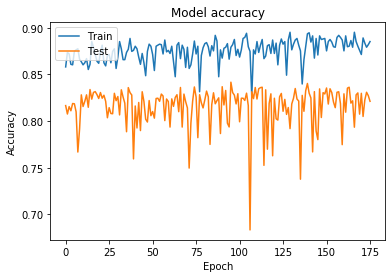

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()